In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, f1_score, recall_score, roc_auc_score, precision_score
from sklearn.metrics import classification_report, roc_curve,auc
from imblearn.over_sampling import SMOTE
from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.ensemble import StackingClassifier
from imblearn.over_sampling import ADASYN
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import NearMiss
from imblearn.under_sampling import ClusterCentroids
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import model_selection
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [2]:
data = pd.read_csv('data/default of credit card.csv')

In [3]:
print(data.head())

   ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4   
0   1    20000.0    2          2         1   24      2      2     -1     -1  \
1   2   120000.0    2          2         2   26     -1      2      0      0   
2   3    90000.0    2          2         2   34      0      0      0      0   
3   4    50000.0    2          2         1   37      0      0      0      0   
4   5    50000.0    1          2         1   57     -1      0     -1      0   

   ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3   
0  ...        0.0        0.0        0.0       0.0     689.0       0.0  \
1  ...     3272.0     3455.0     3261.0       0.0    1000.0    1000.0   
2  ...    14331.0    14948.0    15549.0    1518.0    1500.0    1000.0   
3  ...    28314.0    28959.0    29547.0    2000.0    2019.0    1200.0   
4  ...    20940.0    19146.0    19131.0    2000.0   36681.0   10000.0   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  default.payment.next.month  
0       0.0       0.0   

In [4]:
X = data.drop(['default.payment.next.month'], axis=1)
y = data['default.payment.next.month']

In [5]:
seed = 50
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

In [6]:
models = []
models.append(('LR', LogisticRegression(max_iter=10000)))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))

In [7]:
def Models(model, X_train, y_train,X_test,y_test):
    results = []
    names = []
    roc_results = []  
    scoring = 'accuracy'
    msg=[]

    for name, model in models:
        kfold = model_selection.KFold(n_splits=10)
        cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)

        model.fit(X_train, y_train)
        y_prob = model.predict_proba(X_test)[:, 1]  # Assuming binary classification

        fpr, tpr, thresholds = roc_curve(y_test, y_prob)
        roc_auc = auc(fpr, tpr)

        roc_results.append((fpr, tpr, roc_auc))

        msg.append("%s: %f (%f)" % (name, cv_results.mean(), cv_results.std()))
        
    print(msg)
    plt.figure()
    for name, (fpr, tpr, roc_auc) in zip(names, roc_results):
        plt.plot(fpr, tpr, label='%s (AUC = %0.2f)' % (name, roc_auc))
    plt.plot([0, 1], [0, 1], 'k--') 
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()
        


['LR: 0.776292 (0.005867)', 'LDA: 0.809333 (0.005151)', 'KNN: 0.744542 (0.006367)', 'CART: 0.719625 (0.005529)', 'NB: 0.373417 (0.008915)']


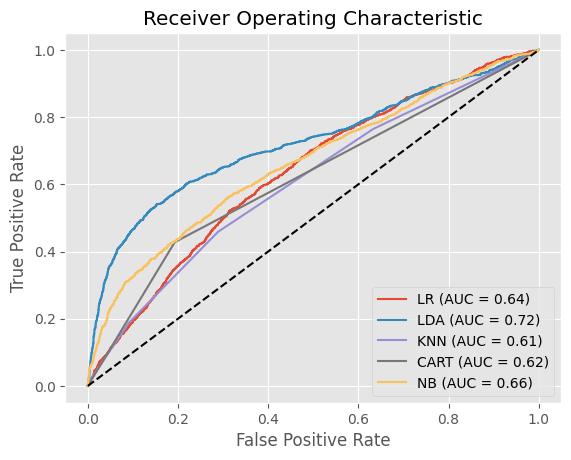

In [8]:
Models(models, X_train, y_train,X_test,y_test) 

['LR: 0.533627 (0.055110)', 'LDA: 0.676937 (0.026055)', 'KNN: 0.729434 (0.121058)', 'CART: 0.749775 (0.063166)', 'NB: 0.547755 (0.276600)']


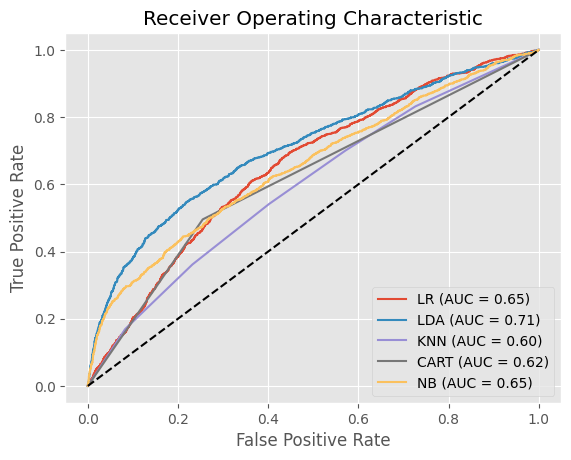

In [9]:
# Apply SMOTE to oversample the minority class
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
Models(models, X_train_smote, y_train_smote,X_test,y_test) 

['LR: 0.475446 (0.095735)', 'LDA: 0.668160 (0.020774)', 'KNN: 0.689535 (0.076898)', 'CART: 0.733033 (0.050696)', 'NB: 0.540915 (0.277352)']


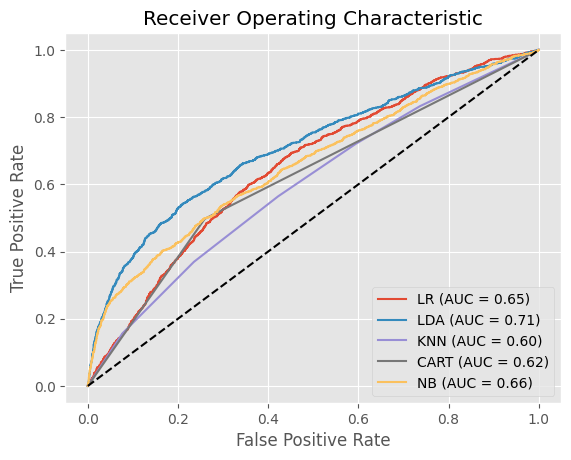

In [10]:
# Apply ADASYN to oversample the minority class
adasyn = ADASYN(random_state=42)
X_train_adasyn, y_train_adasyn = adasyn.fit_resample(X_train, y_train)
Models(models, X_train_adasyn, y_train_adasyn,X_test,y_test) 

['LR: 0.502764 (0.069014)', 'LDA: 0.585930 (0.054521)', 'KNN: 0.688534 (0.083647)', 'CART: 0.893916 (0.074456)', 'NB: 0.542012 (0.276135)']


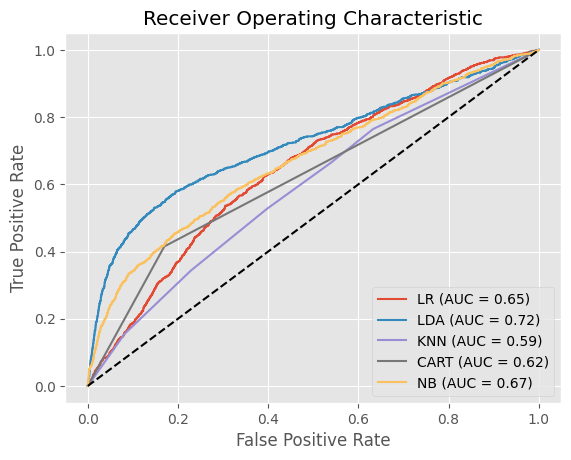

In [11]:
# Apply Random Oversampling to balance the classes
oversampler = RandomOverSampler(random_state=42)
X_train_oversampler, y_train_oversampler = oversampler.fit_resample(X_train, y_train)
Models(models, X_train_oversampler, y_train_oversampler,X_test,y_test) 

['LR: 0.533627 (0.055110)', 'LDA: 0.676937 (0.026055)', 'KNN: 0.729434 (0.121058)', 'CART: 0.748379 (0.065262)', 'NB: 0.547755 (0.276600)']


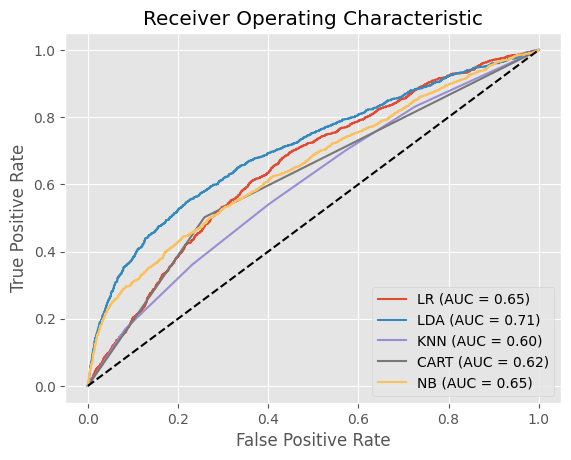

In [12]:
_# Apply Near Miss undersampling to balance the classes
undersampler = NearMiss(version=1)
undersampler_X_train, undersampler_y_train = undersampler.fit_resample(X_train, y_train)
Models(models, X_train_smote, y_train_smote,X_test,y_test) 

In [13]:
# Apply Cluster Centroids undersampling to balance the classes
undersampler = ClusterCentroids(random_state=42)
X_train_undersampler, y_train_undersampler = undersampler.fit_resample(X_train, y_train)

F:\anaconda\envs\gpu\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


['LR: 0.533627 (0.055110)', 'LDA: 0.676937 (0.026055)', 'KNN: 0.729434 (0.121058)', 'CART: 0.750070 (0.065470)', 'NB: 0.547755 (0.276600)']


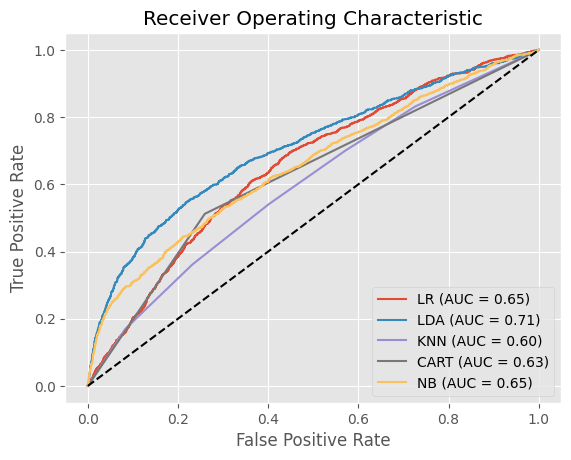

In [14]:
Models(models, X_train_smote, y_train_smote,X_test,y_test) 